In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
시군구상권코드=pd.read_csv("c:/data/project/team/raw/시군구상권코드.csv",encoding='cp949')
집객시설=pd.read_csv("c:/data/project/team/raw/집객시설.csv",encoding='cp949') 
유동인구=pd.read_csv("c:/data/project/team/raw/유동인구.csv",encoding='cp949') 
직장인구=pd.read_csv("c:/data/project/team/raw/직장인구.csv",encoding='cp949') 
편의점매출=pd.read_csv("c:/data/project/team/raw/편의점매출.csv",encoding='cp949') 
편의점수=pd.read_csv("c:/data/project/team/raw/편의점수.csv",encoding='cp949')
상주인구=pd.read_csv("c:/data/project/team/raw/상주인구.csv",encoding='cp949')
술집=pd.read_csv("c:/data/project/team/raw/간이술집.csv",encoding='cp949')


In [2]:
시군구상권코드=시군구상권코드.loc[:,['상권코드','시군구명']]

In [3]:
#  편의점 매출 자료 추출
#  당월매출금액 / 점포수 = 개별 점포 매출금액 
편의점매출=편의점매출.loc[:,['상권코드','점포별월매출금액']]
편의점매출=편의점매출.groupby(['상권코드'],as_index=False).mean()
편의점매출
 

,상권코드,점포별월매출금액
0,1000001,2.068619e+08
1,1000002,2.055070e+08
2,1000003,1.488270e+08
3,1000004,2.887345e+08
4,1000005,7.954911e+07
...,...,...
1262,1001492,2.141036e+08
1263,1001493,2.081689e+08
1264,1001494,1.480367e+08
1265,1001495,1.873726e+08


In [4]:
#편의점수
편의점수1=편의점수.loc[:,['상권코드','일반편의점점포수','프랜차이즈점포수','총편의점점포수']]
편의점수2=편의점수.loc[:,['상권코드','개업점포수','폐업점포수']]
편의점수1=편의점수1.groupby(['상권코드'],as_index=False).mean()
편의점수2=편의점수2.groupby(['상권코드'],as_index=False).sum()
편의점수=pd.merge(편의점수1,편의점수2)
편의점수['생존률']=편의점수['총편의점점포수']/(편의점수['총편의점점포수']+편의점수['폐업점포수'])
# 편의점수.to_csv("c:/data/project/team/revised_clf/편의점수.csv",encoding='cp949',index=False)

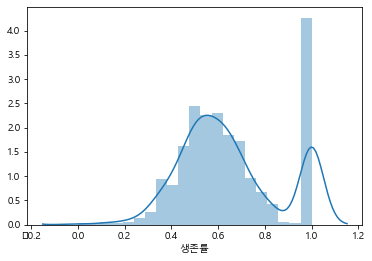

In [5]:
# 종속변수 "생존률" 파악
sns.distplot(편의점수["생존률"])

In [6]:
# 결측치 파악 == 처음부터 해당상권에 편의점이 없었던 경우
편의점수[편의점수["생존률"].isnull()].head()
# 결측치값을 0으로 변환 
편의점수=편의점수.fillna(0)

In [7]:
# 생존률이 0 인경우 == 과거 해당상권에 편의점이 있었지만 아예 사라진 경우
편의점수=편의점수[편의점수["생존률"]!=0]


In [8]:
# 생존률이 0인 데이터 제거 확인
편의점수[편의점수["생존률"]==0]

,상권코드,일반편의점점포수,프랜차이즈점포수,총편의점점포수,개업점포수,폐업점포수,생존률


In [9]:
# 생존률이 1인경우 == 폐업 편의점이 없는 경우를 확인
편의점수[편의점수["생존률"]==1]
편의점수=편의점수[편의점수["생존률"]!=1]

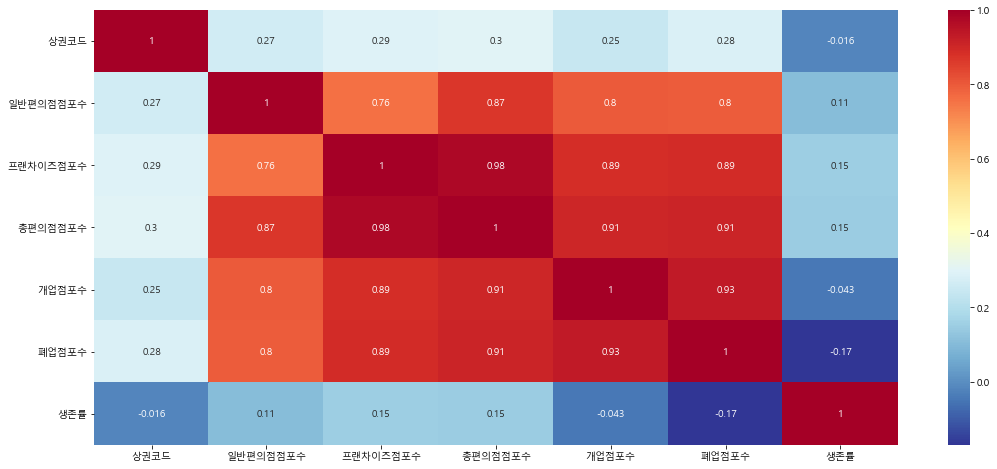

In [10]:
# 히트맵으로 편의점수의 데이터에 상관관계 파악 
# 프렌차이즈점포수-일반편의점점포수-총편의점수 // 폐업률-폐업률1-폐업점포수 다중공선성 가능성이 크다고 파악 
plt.figure(figsize=(18,8))
corrmat=sns.heatmap(편의점수.corr(), annot=True, cmap='RdYlBu_r')
plt.show()

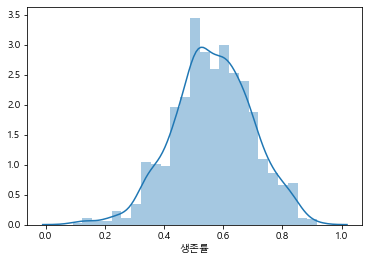

In [11]:
# 종속변수 "생존률" 파악
sns.distplot(편의점수["생존률"])

In [12]:
# 다중공선성이 높은 총편의점수를 제외
편의점수=편의점수.loc[:,['상권코드','총편의점점포수','일반편의점점포수','프랜차이즈점포수','생존률']]


In [13]:
#직장인구
직장인구=직장인구.loc[:,['상권코드','총직장인구수']]
직장인구=직장인구.groupby(['상권코드'],as_index=False).mean()
직장인구
 

,상권코드,총직장인구수
0,1000001,782.75
1,1000002,345.75
2,1000003,1660.70
3,1000004,25.10
4,1000005,404.55
...,...,...
1489,1001492,160782.75
1490,1001493,11008.15
1491,1001494,30620.05
1492,1001495,27417.60


In [14]:
#유동인구
유동인구=유동인구.loc[:,['상권코드','연령대10유동인구수','연령대20유동인구수','연령대30유동인구수','연령대40유동인구수','연령대50유동인구수','연령대60이상유동인구수']]
유동인구=유동인구.groupby(['상권코드'],as_index=False).mean()
유동인구
 

,상권코드,연령대10유동인구수,연령대20유동인구수,연령대30유동인구수,연령대40유동인구수,연령대60이상유동인구수
0,1000001,8780.111111,2.538872e+04,3.545289e+04,3.101072e+04,12735.333333
1,1000002,7399.888889,3.346139e+04,4.154144e+04,4.020422e+04,40511.833333
2,1000003,1920.500000,2.344061e+04,2.394378e+04,2.207483e+04,14998.055556
3,1000004,30163.277778,1.256940e+05,2.414961e+04,2.102894e+04,10618.277778
4,1000005,555.222222,5.400889e+03,2.987444e+03,3.471000e+03,1910.555556
...,...,...,...,...,...,...
1490,1001492,134880.166667,1.487814e+06,1.822675e+06,1.511984e+06,689847.166667
1491,1001493,70052.555556,6.065968e+05,7.095846e+05,5.361408e+05,289701.888889
1492,1001494,119454.888889,1.373275e+06,1.221432e+06,1.041952e+06,682026.000000
1493,1001495,70165.722222,4.155100e+05,4.180486e+05,3.186401e+05,182319.944444


In [15]:
#상주인구
상주인구=상주인구.loc[:,['상권코드','총상주인구수','연령대20상주인구수']]
상주인구=상주인구.groupby(['상권코드'],as_index=False).mean()
상주인구
 

,상권코드,총상주인구수,연령대20상주인구수
0,1000001,1768.600000,204.850000
1,1000002,839.650000,306.050000
2,1000003,1157.000000,159.250000
3,1000004,1407.900000,433.000000
4,1000005,1711.900000,241.350000
...,...,...,...
1485,1001492,1140.200000,75.100000
1486,1001493,2094.050000,342.500000
1487,1001494,2608.950000,298.450000
1488,1001495,10114.600000,1566.200000


In [16]:
#집객시설 결측치 확인
# 각각 집객시설이 없는경우 nan값 부여되어있으므로 0으로 결측치를 채워줌
집객시설.isnull().sum()
집객시설=집객시설.fillna(0)


In [17]:
#집객시설
집객시설['의료기관'] = 집객시설['종합병원수'] + 집객시설['일반병원수']
집객시설['교육기관'] = 집객시설['유치원수'] + 집객시설['초등학교수'] + 집객시설['중학교수'] + 집객시설['고등학교수'] 
집객시설=집객시설.loc[:,['상권코드','극장수','버스터미널수','버스정거장수','지하철역수','숙박시설수','의료기관','교육기관','대학교수']]
집객시설=집객시설.groupby(['상권코드'],as_index=False).mean()
집객시설
 

,상권코드,극장수,버스터미널수,버스정거장수,지하철역수,숙박시설수,의료기관,교육기관,대학교수
0,1000001,12.7,0.0,7.6,0.0,21.2,0.0,0.0,0.0
1,1000002,0.4,0.0,1.0,0.0,2.4,0.0,0.0,0.0
2,1000003,1.8,0.0,4.3,0.0,9.6,0.0,3.0,0.2
3,1000004,0.0,0.0,8.0,0.0,0.4,0.0,0.0,0.0
4,1000005,0.8,0.0,3.9,0.0,0.8,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1469,1001492,60.6,0.0,40.4,2.0,31.8,0.0,0.4,0.0
1470,1001493,13.2,0.0,18.6,3.4,14.0,2.2,4.4,0.0
1471,1001494,16.0,0.0,39.6,5.0,33.0,0.0,0.0,0.0
1472,1001495,20.0,0.0,24.0,1.2,25.8,0.0,1.0,0.0


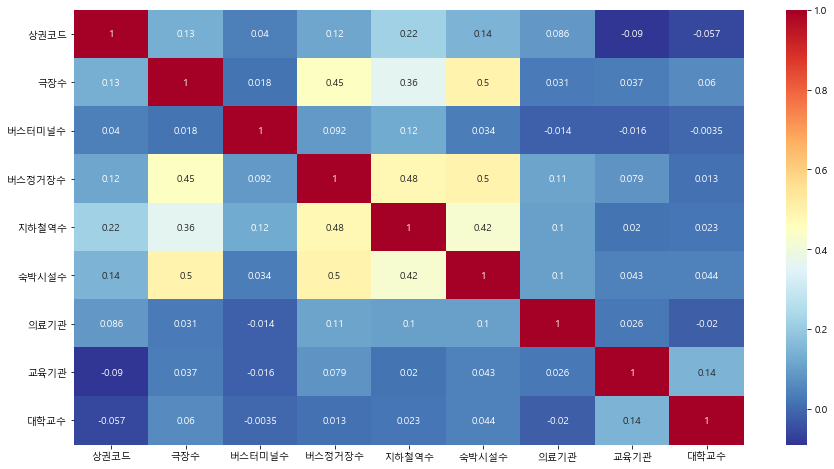

In [18]:
# 다중공선성 확인 
plt.figure(figsize=(15,8))
corrmat=sns.heatmap(집객시설.corr(), annot=True, cmap='RdYlBu_r')
plt.show()

In [19]:
#술집
술집=술집.loc[:,['상권코드','술집점포수']]
술집=술집.groupby(['상권코드'],as_index=False).mean()

In [20]:
#모든 데이터파일 병합
from functools import reduce
df_list = [집객시설,유동인구,직장인구,편의점매출,상주인구,술집,편의점수] 
최종편의점 = reduce(lambda left, right: pd.merge(left, right, on=[ '상권코드']), df_list) 

In [21]:
# 최종데이터파일 저장
# 최종편의점.to_csv("c:/data/project/team/revised/최종데이터파일.csv",encoding='cp949')